# Logistic Regression Implementation
The data I will be working with is from a telecom company that is looking at their churn rate based on various factors. Churn is determining the number of people who continue or discontinue their subscription with the telecom company. Various factors are included in the data such as seconds of use and distinct called number to complaints and age group. 

Here I want to use logistic regression to determine if a subscriber will continue or cancel their subscription to the telecom company based on various features.

The data comes from [here](archive.ics.uci.edu/dataset/563/iranian+churn+dataset)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
df = pd.read_csv('telecom.csv')
df

,ID,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Tariff plan,Status,Age group,Complaints,Churn
0,1,35,0,1420,41,36,20,1,A,Active,30-40,N,0
1,2,28,0,920,32,20,12,7,A,Active,Under 30,N,0
2,3,40,0,88,6,8,6,0,A,Inactive,30-40,N,1
3,4,38,0,13963,170,9,47,9,A,Active,30-40,N,0
4,5,38,0,13773,169,0,44,7,A,Active,30-40,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3146,33,0,0,0,0,0,0,A,Inactive,Under 30,N,0
3146,3147,37,0,1370,40,24,7,5,A,Inactive,30-40,N,0
3147,3148,34,7,10320,88,3,43,18,A,Active,Over 40,N,0
3148,3149,23,0,1110,27,21,14,7,A,Active,Under 30,N,0


In [16]:
df = df.drop(columns=['ID', 'Tariff plan', 'Complaints']) # I want to work with numbers only and want to drop unnecessary data
df

,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Status,Age group,Churn
0,35,0,1420,41,36,20,1,Active,30-40,0
1,28,0,920,32,20,12,7,Active,Under 30,0
2,40,0,88,6,8,6,0,Inactive,30-40,1
3,38,0,13963,170,9,47,9,Active,30-40,0
4,38,0,13773,169,0,44,7,Active,30-40,0
...,...,...,...,...,...,...,...,...,...,...
3145,33,0,0,0,0,0,0,Inactive,Under 30,0
3146,37,0,1370,40,24,7,5,Inactive,30-40,0
3147,34,7,10320,88,3,43,18,Active,Over 40,0
3148,23,0,1110,27,21,14,7,Active,Under 30,0


In [17]:
df = pd.get_dummies(df, columns = ['Status', 'Age group'], drop_first=True)
# get dummies so that categorical variables are converted to numerical values for these columns
df

,Subscription length,Charge amount,Seconds of use,Frequency of use,Frequency of SMS,Distinct called numbers,Call failures,Churn,Status_Inactive,Age group_Over 40,Age group_Under 30
0,35,0,1420,41,36,20,1,0,False,False,False
1,28,0,920,32,20,12,7,0,False,False,True
2,40,0,88,6,8,6,0,1,True,False,False
3,38,0,13963,170,9,47,9,0,False,False,False
4,38,0,13773,169,0,44,7,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3145,33,0,0,0,0,0,0,0,True,False,True
3146,37,0,1370,40,24,7,5,0,True,False,False
3147,34,7,10320,88,3,43,18,0,False,True,False
3148,23,0,1110,27,21,14,7,0,False,False,True


Setting up training values to train the model.

Training Accuracy: 0.8539682539682539
[[504  23]
 [ 69  34]]
              precision    recall  f1-score   support

     Renewed       0.88      0.96      0.92       527
 Not Renewed       0.60      0.33      0.42       103

    accuracy                           0.85       630
   macro avg       0.74      0.64      0.67       630
weighted avg       0.83      0.85      0.84       630



/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/linear_model/_linear_los

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

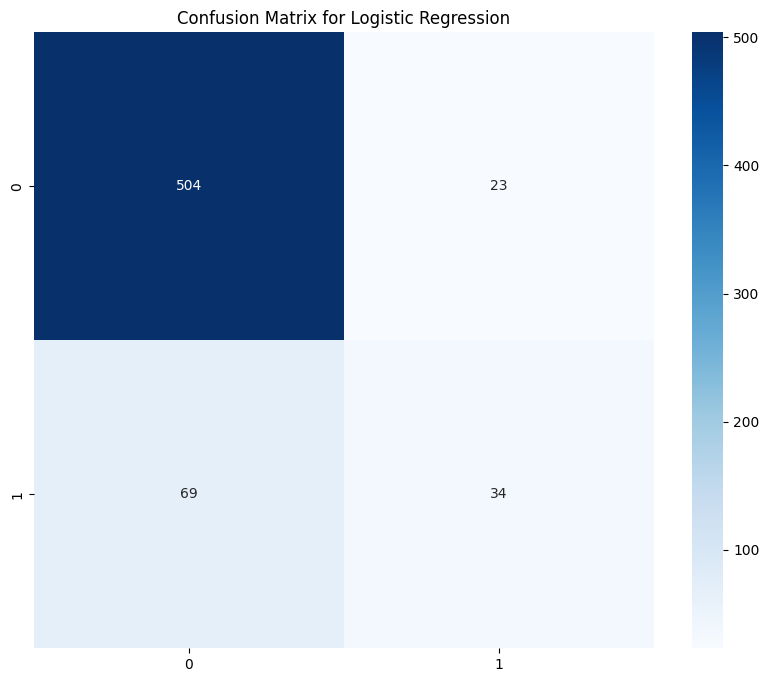

In [18]:
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_new = logreg.predict(X_test_scaled)

print("Training Accuracy:", accuracy_score(y_test, y_pred_new))
print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new, target_names=['Renewed', 'Not Renewed']))

fig = plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_new)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')

Data was scaled to prevent having to change it in case of low accuracy. 0.85 accuracy is satisfactory and the confusion matrix and classification reports are also given. The confusion matrix backs up the accuracy report by showing that most are true negatives (in this case 0 represents people renewing their subscription).

Lastly, I want to determine the Receiver Operating Characteristic Curve (ROC) which is a graphical representation of a binary classifier's performance at various threshold settings. ROC curve plots true positive rate against false positive rate.

/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/krishpatel/Documents/CMOR438/CMOR438/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


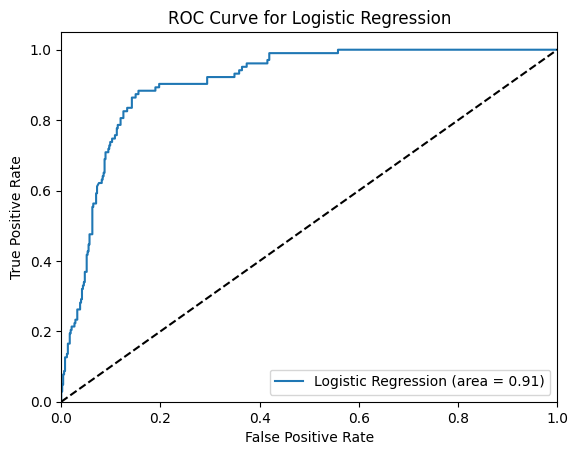

In [19]:
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

my_roc_curve = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % my_roc_curve)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

I get a really good result where the prediction accuracy score is 0.91 and the model can predict a true positive at a much higher rate than a false positive. This means that the algorithm has been trained well and would be able to determine the churn rate for the telecom company with 91% accuracy.

This would be useful to the telecom company for determining their budget for the next fiscal year as they would be able to figure out how many of their subscribers will resubscribe to their plan.